# NaN Fault Demo

In [1]:
import sys
import os

# Add the repo root to sys.path
repo_root = os.path.abspath("..")
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

from fault_injector.generate_data import DataGen
from fault_injector.injector import Injector
from fault_injector.fault_lib import *
import numpy as np
import matplotlib.pyplot as plt

## Starting Data

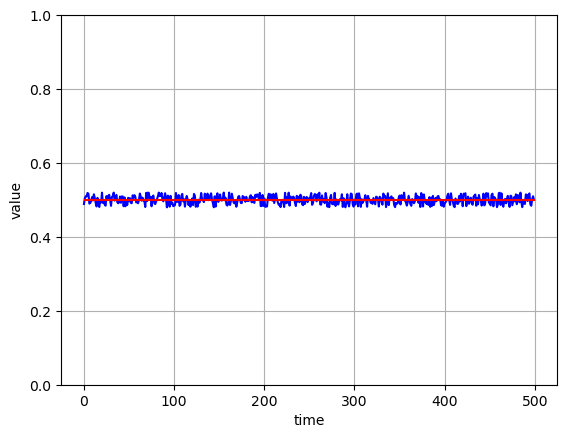

In [2]:
rand_max = 0.52
rand_min = 0.48
size = 500

# create class object
gen_obj = DataGen(rand_max, rand_min, size)

# generate synthetic data
gen_obj.random_gen()
original_values = np.array(gen_obj.values)
gen_obj.plot_values()

## Define Fault

In [3]:
fault_obj = NaNFault()

## Define Injector

In [4]:
injector_params = {"start":100,
                   "stop": 400}
injector_object = Injector(fault=fault_obj,
                           params=injector_params)

## Inject Fault

In [5]:
new_values = injector_object.inject_fault(x=original_values)

## Compare Original to New Values

In [6]:
def plot_comparison(original_values, new_values):
    fig, ax = plt.subplots(figsize=(10, 4))

    # plot original (blue)
    ax.plot(original_values, color='blue', label="Original")

    # plot new values (red)
    ax.plot(new_values, color='red', label="New Values")

    # axis labels
    ax.set(xlabel="time", ylabel="value")

    # dynamic y-limit
    ymin = min(min(original_values), min(new_values)) * 0.995
    ymax = max(max(original_values), max(new_values)) * 1.005
    ax.set_ylim([ymin, ymax])

    ax.grid()
    ax.legend()
    plt.tight_layout()
    plt.show()


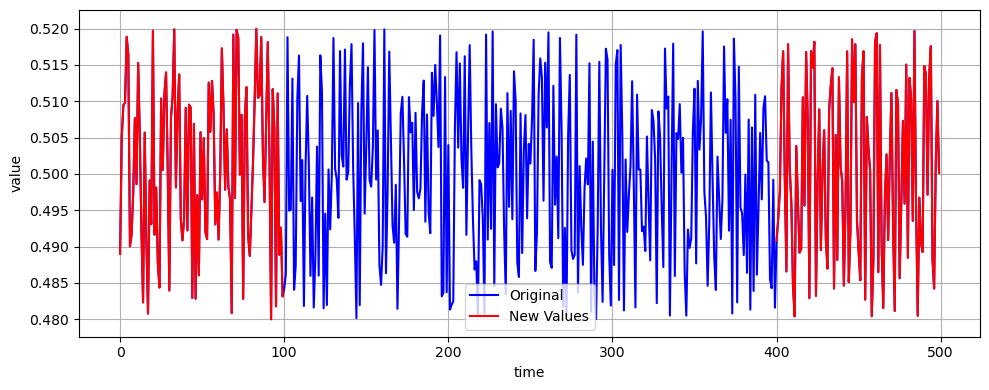

In [7]:
plot_comparison(original_values, new_values)